In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
# import shap
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import inv_boxcox
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)

from lightgbm.sklearn import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor



from utilidades.graficar import ver_dispersion
from utilidades.reducir_uso_memoria import reduce_mem_usage

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"
ruta_features = ruta_data + "/features/"

In [4]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [5]:
tiene_terraza = pd.read_csv(f"{ruta_data}/features/tiene_terraza_train.csv")

train_limpio["tiene_terraza"] = tiene_terraza

tiene_terraza_tes = pd.read_csv(f"{ruta_data}/features/tiene_terraza_test.csv")

test_limpio["tiene_terraza"] = tiene_terraza_tes

tiene_jardin = pd.read_csv(f"{ruta_data}/features/tiene_jardin_train.csv")

train_limpio["tiene_jardin"] = tiene_jardin

tiene_jardin_tes = pd.read_csv(f"{ruta_data}/features/tiene_jardin_test.csv")

test_limpio["tiene_jardin"] = tiene_jardin_tes

tiene_servicio = pd.read_csv(f"{ruta_data}/features/tiene_servicio_train.csv")

train_limpio["tiene_servicio"] = tiene_servicio

tiene_servicio_tes = pd.read_csv(f"{ruta_data}/features/tiene_servicio_test.csv")

test_limpio["tiene_servicio"] = tiene_servicio_tes

tiene_vestidor = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_train.csv")

train_limpio["tiene_vestidor"] = tiene_vestidor

tiene_vestidor_tes = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_test.csv")

test_limpio["tiene_vestidor"] = tiene_vestidor_tes

tiene_vista = pd.read_csv(f"{ruta_data}/features/tiene_vista_train.csv")

train_limpio["tiene_vista"] = tiene_vista

tiene_vista_tes = pd.read_csv(f"{ruta_data}/features/tiene_vista_test.csv")

test_limpio["tiene_vista"] = tiene_vista_tes

tiene_salon = pd.read_csv(f"{ruta_data}/features/tiene_salon_train.csv")

train_limpio["tiene_salon"] = tiene_salon

tiene_salon_tes = pd.read_csv(f"{ruta_data}/features/tiene_salon_test.csv")

test_limpio["tiene_salon"] = tiene_salon_tes

tiene_cuarto = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_train.csv")

train_limpio["tiene_cuarto"] = tiene_cuarto

tiene_cuarto_tes = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_test.csv")

test_limpio["tiene_cuarto"] = tiene_cuarto_tes

tiene_family = pd.read_csv(f"{ruta_data}/features/tiene_family_train.csv")

train_limpio["tiene_family"] = tiene_family

tiene_family_tes = pd.read_csv(f"{ruta_data}/features/tiene_family_test.csv")

test_limpio["tiene_family"] = tiene_family_tes

tiene_bosque = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_train.csv")

train_limpio["bosque_dir"] = tiene_bosque

tiene_bosque_tes = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_test.csv")

test_limpio["bosque_dir"] = tiene_bosque_tes

tiene_avenida = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_train.csv")

train_limpio["avenida_dir"] = tiene_avenida

tiene_avenida_tes = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_test.csv")

test_limpio["avenida_dir"] = tiene_avenida_tes

tiene_fuente = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_train.csv")

train_limpio["fuente_dir"] = tiene_fuente

tiene_fuente_tes = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_test.csv")

test_limpio["fuente_dir"] = tiene_fuente_tes

#Empeoro

# tiene_vis = pd.read_csv(f"{ruta_data}/features/tiene_vista_dir_train.csv")

# train_limpio["vis_dir"] = tiene_vis

tiene_golf = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_train.csv")

train_limpio["golf_dir"] = tiene_golf

tiene_golf_tes = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_test.csv")

test_limpio["golf_dir"] = tiene_golf_tes

In [6]:
tiene_hectarea = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_train.csv")

train_limpio["tiene_hectarea"] = tiene_hectarea

tiene_hectarea_tes = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_test.csv")

test_limpio["tiene_hectarea"] = tiene_hectarea_tes

tiene_torre = pd.read_csv(f"{ruta_data}/features/tiene_torre_train.csv")

train_limpio["tiene_torre"] = tiene_torre

tiene_torre_tes = pd.read_csv(f"{ruta_data}/features/tiene_torre_test.csv")

test_limpio["tiene_torre"] = tiene_torre_tes

In [7]:
score_tf_train = pd.read_csv(f"{ruta_data}/features/scores_tfidf_train.csv")

train_limpio["score_tfidf"] = score_tf_train

In [8]:
train = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train.csv", usecols=["provincia", "tipodepropiedad", "ciudad"]))

In [9]:
train_limpio["suma_metros"] = train_limpio["metrostotales"] + train_limpio["metroscubiertos"]

In [10]:
train_limpio = train_limpio.drop([ftr for ftr in train_limpio.columns if ftr.startswith("tipodepropiedad")], axis=1)

In [11]:
train_limpio = train_limpio.drop([ftr for ftr in train_limpio.columns if ftr.startswith("provincia")], axis=1)

In [12]:
train_limpio["provincia"] = train["provincia"]
train_limpio["tipodepropiedad"] = train["tipodepropiedad"]
train_limpio["ciudad"] = train["ciudad"]

In [13]:
le = LabelEncoder()

In [14]:
train_limpio["provincia"] = train_limpio["provincia"].fillna(train_limpio["provincia"].mode()[0])

In [15]:
# cuantiles = pd.read_csv(f"{ruta_features}cuantiles_por_provincia.csv")

In [16]:
# train_lim_cat = train_lim_cat.merge(cuantiles, how="left")

In [17]:
train_limpio["provincia"] = le.fit_transform(train_limpio["provincia"])

In [18]:
train_limpio["tipodepropiedad"] = train_limpio["tipodepropiedad"].fillna(train_limpio["tipodepropiedad"].mode()[0])

train_limpio["tipodepropiedad"] = le.fit_transform(train_limpio["tipodepropiedad"])

In [19]:
train_limpio["ciudad"] = train_limpio.groupby("provincia")["ciudad"].apply(lambda x: x.fillna(x.mode()))
train_limpio["ciudad"] = train_limpio["ciudad"].fillna(train_limpio["ciudad"].mode()[0])
train_limpio["ciudad"] = le.fit_transform(train_limpio["ciudad"])

In [20]:
train_limpio["idzona"] = le.fit_transform(train_limpio["idzona"])

In [21]:
#train_limpio = pd.concat([train_limpio, pd.read_csv(f"{ruta_features}tfidf_vect_train_300.csv", dtype={f"tf{i}":np.float32 for i in range(300)})],axis=1)

In [53]:
X, y = train_limpio.drop(["precio", "anio_mes"], axis=1),train_limpio["precio"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [25]:
# y_train_pow, lam = stats.boxcox(y_train) Con el sqrt que viene funca mejor

In [55]:
%%time
# y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train, categorical_feature=["provincia",
                                                                    "tipodepropiedad",
                                                                    "ciudad",
                                                                    "tiene_terraza",
                                                                    "tiene_jardin",
                                                                    "tiene_servicio",
                                                                    "tiene_vestidor",
                                                                    "tiene_vista",
                                                                    "tiene_salon",
                                                                    "tiene_cuarto",
                                                                    "tiene_family",
                                                                    "bosque_dir",
                                                                    "avenida_dir",
                                                                    "fuente_dir",
                                                                    "golf_dir",
                                                                    "tiene_hectarea",
                                                                    "tiene_torre",
                                                                    "idzona"])
"""params = {
'num_leaves': 300,
"learning_rate": 0.01,
"num_iterations": 4000,
"feature_fraction":0.6,
"max_bin": 1000,
"reg_sqrt":True,
}
"""
"""
{"objective":"regression_l1",
                 "num_leaves":400,
                 "learning_rate":0.4,
                 "alpha":0.5,
                 "max_bin":1000,
                 "feature_fraction": 0.8,
                 "reg_sqrt":True,
                "min_data_in_leaf": 50,
                "lambda_l1":2}
"""

params = {"feature_fraction":0.5959853966635414,
          "lambda_l1":26.82894063964651,
          "learning_rate":0.05141681335686303,
          "max_bin":10000,
          "min_data_in_leaf":20,
          "num_iterations":4000,
          "num_leaves":250,
          "reg_sqrt":True
}

reg = lgb.train(params,d_train)
pred = reg.predict(X_test)
# pred = inv_boxcox(pred, lam)
# pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/julian/.local/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


CPU times: user 36min 41s, sys: 23.7 s, total: 37min 5s
Wall time: 13min 15s


In [56]:
# 511439 con binning de antiguedades
# 510386 4k iteraciones, con ciudades y tfidf
# 510094 idem pero sacando acentos de las palabras
# 509717 con mas palabras en la consulta
# 
# 492296 con 16k iteraciones y lo de arriba
#554316 con QuantileRegression sin iters
mean_absolute_error(y_test, pred)

496896.49141290545

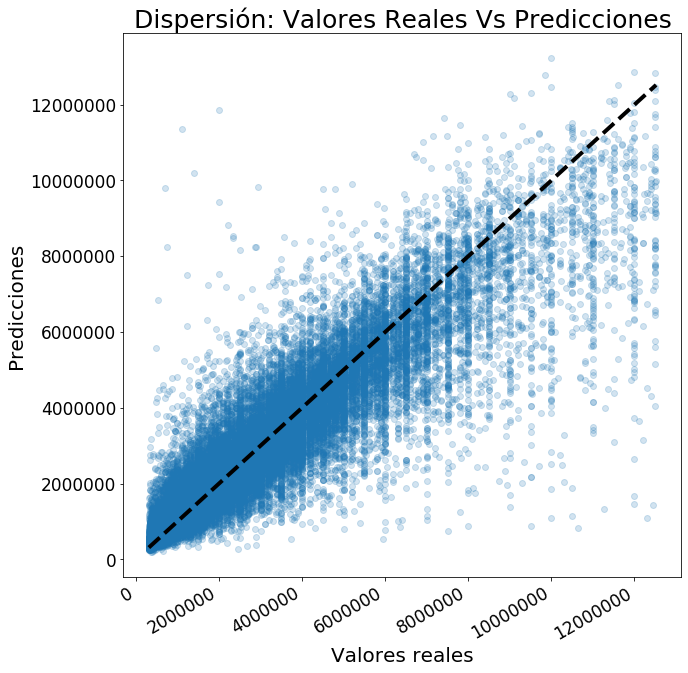

In [57]:
ver_dispersion(y_test, pred)

In [70]:
n_dimensiones = 1000

In [71]:
desc_train = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_{n_dimensiones}d.csv")

In [73]:
tit_train = pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_train_50d.csv")

In [47]:
# train_lim_des = pd.concat([train_limpio, desc_train], axis=1)

In [74]:
train_lim_des = pd.concat([train_limpio, desc_train, tit_train], axis=1)

In [75]:
X, y = train_lim_des.drop(["precio"], axis=1),train_lim_des["precio"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

#### Probar con 0.07 learning rate y 4k iter o con 0.01 learning rate y 16k iter

In [77]:
%%time

d_train = lgb.Dataset(X_train, label= y_train, categorical_feature=["provincia",
                                                                    "tipodepropiedad",
                                                                    "ciudad",
                                                                    "tiene_terraza",
                                                                    "tiene_jardin",
                                                                    "tiene_servicio",
                                                                    "tiene_vestidor",
                                                                    "tiene_vista",
                                                                    "tiene_salon",
                                                                    "tiene_cuarto",
                                                                    "tiene_family",
                                                                    "bosque_dir",
                                                                    "avenida_dir",
                                                                    "fuente_dir",
                                                                    "golf_dir",
                                                                    "tiene_hectarea",
                                                                    "tiene_torre",
                                                                    "idzona"])

params = {"feature_fraction":0.5959853966635414,
          "lambda_l1":26.82894063964651,
          "learning_rate":0.05141681335686303,
          "max_bin":10000,
          "min_data_in_leaf":20,
          "num_iterations":16000,
          "num_leaves":250,
          "reg_sqrt":True
}

reg = lgb.train(params,d_train)
pred = reg.predict(X_test)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/julian/.local/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


CPU times: user 52min 50s, sys: 25.6 s, total: 53min 16s
Wall time: 27min 1s


In [78]:
# 471 con feature hashing de descripciones sin bigramas
mean_absolute_error(y_test, pred)

466933.3846523274

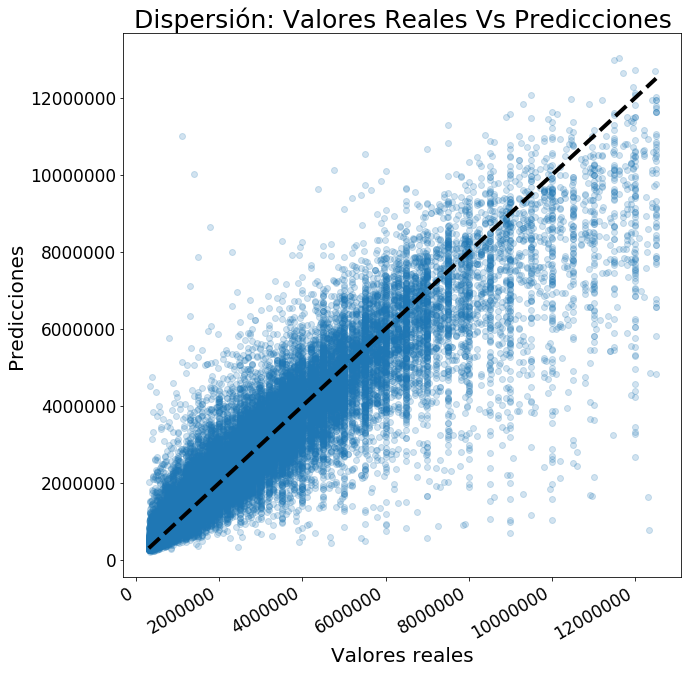

In [79]:
ver_dispersion(y_test, pred)